<a href="https://colab.research.google.com/github/Dinesh-Kumar-Verma/Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Predictionn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction


##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt


### Dataset Loading

In [2]:
# Load Dataset
try:
    # Try reading the file with UTF-8 encoding
    df = pd.read_csv('SeoulBikeData.csv', encoding='utf-8')
except UnicodeDecodeError:
    # If UTF-8 fails, try reading with Latin-1 encoding
    df = pd.read_csv('SeoulBikeData.csv', encoding='latin-1')


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Shape of the DataSet -", df.shape)
print("There are %d rows and %d column" %(df.shape[0], df.shape[1]))

Shape of the DataSet - (8760, 14)
There are 8760 rows and 14 column


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Visualizing the missing values


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include = "all").T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

### Variables Description

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

<b>Attribute Information: </b>

* **Date :**year-month-day
* **Rented Bike count :**Count of bikes rented at each hour
* **Hour :**Hour of the day
* **Temperature :**Temperature in Celsius
* **Humidity :**%
* **Windspeed :**m/s
* **Visibility :**10m
* **Dew point temperature :**Celsius
* **Solar radiation :**MJ/m2
* **Rainfall :**mm
* **Snowfall :**cm
* **Seasons :**Winter, Spring, Summer, Autumn
* **Holiday :**Holiday/No holiday
* **Functional Day :**NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 365 .
No. of unique values in  Rented Bike Count is 2166 .
No. of unique values in  Hour is 24 .
No. of unique values in  Temperature(°C) is 546 .
No. of unique values in  Humidity(%) is 90 .
No. of unique values in  Wind speed (m/s) is 65 .
No. of unique values in  Visibility (10m) is 1789 .
No. of unique values in  Dew point temperature(°C) is 556 .
No. of unique values in  Solar Radiation (MJ/m2) is 345 .
No. of unique values in  Rainfall(mm) is 61 .
No. of unique values in  Snowfall (cm) is 51 .
No. of unique values in  Seasons is 4 .
No. of unique values in  Holiday is 2 .
No. of unique values in  Functioning Day is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [3]:
dataset= df.copy()

In [4]:
# Renaming the columns names to ensure compatibility, readability, and prevent errors.
dataset.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)


In [5]:
# converting date feature into datetime data type
dataset.date = dataset.date.apply(lambda x : dt.strptime(x,'%d/%m/%Y'))

In [6]:
# Splitting date into year, month, day & day_name
dataset['day'] = dataset['date'].dt.day
dataset['month'] = dataset['date'].dt.month
dataset['year'] = dataset['date'].dt.year
dataset['weekday'] = dataset['date'].dt.day_name()

# droping data column
dataset.drop('date', axis = 1, inplace = True)


In [7]:
# The year count
dataset.year.unique()

array([2017, 2018])

In [8]:
dataset.groupby(['year'])['month'].unique()

year
2017                                   [12]
2018    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Name: month, dtype: object

In [9]:
dataset.month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [10]:
df = dataset

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - Univariate Analysis of the Categorical Data

In [14]:
# defining categorical feature.
categorical_feature = ['hour','seasons', 'holiday', 'func_day', 'day', 'month', 'year', 'weekday']


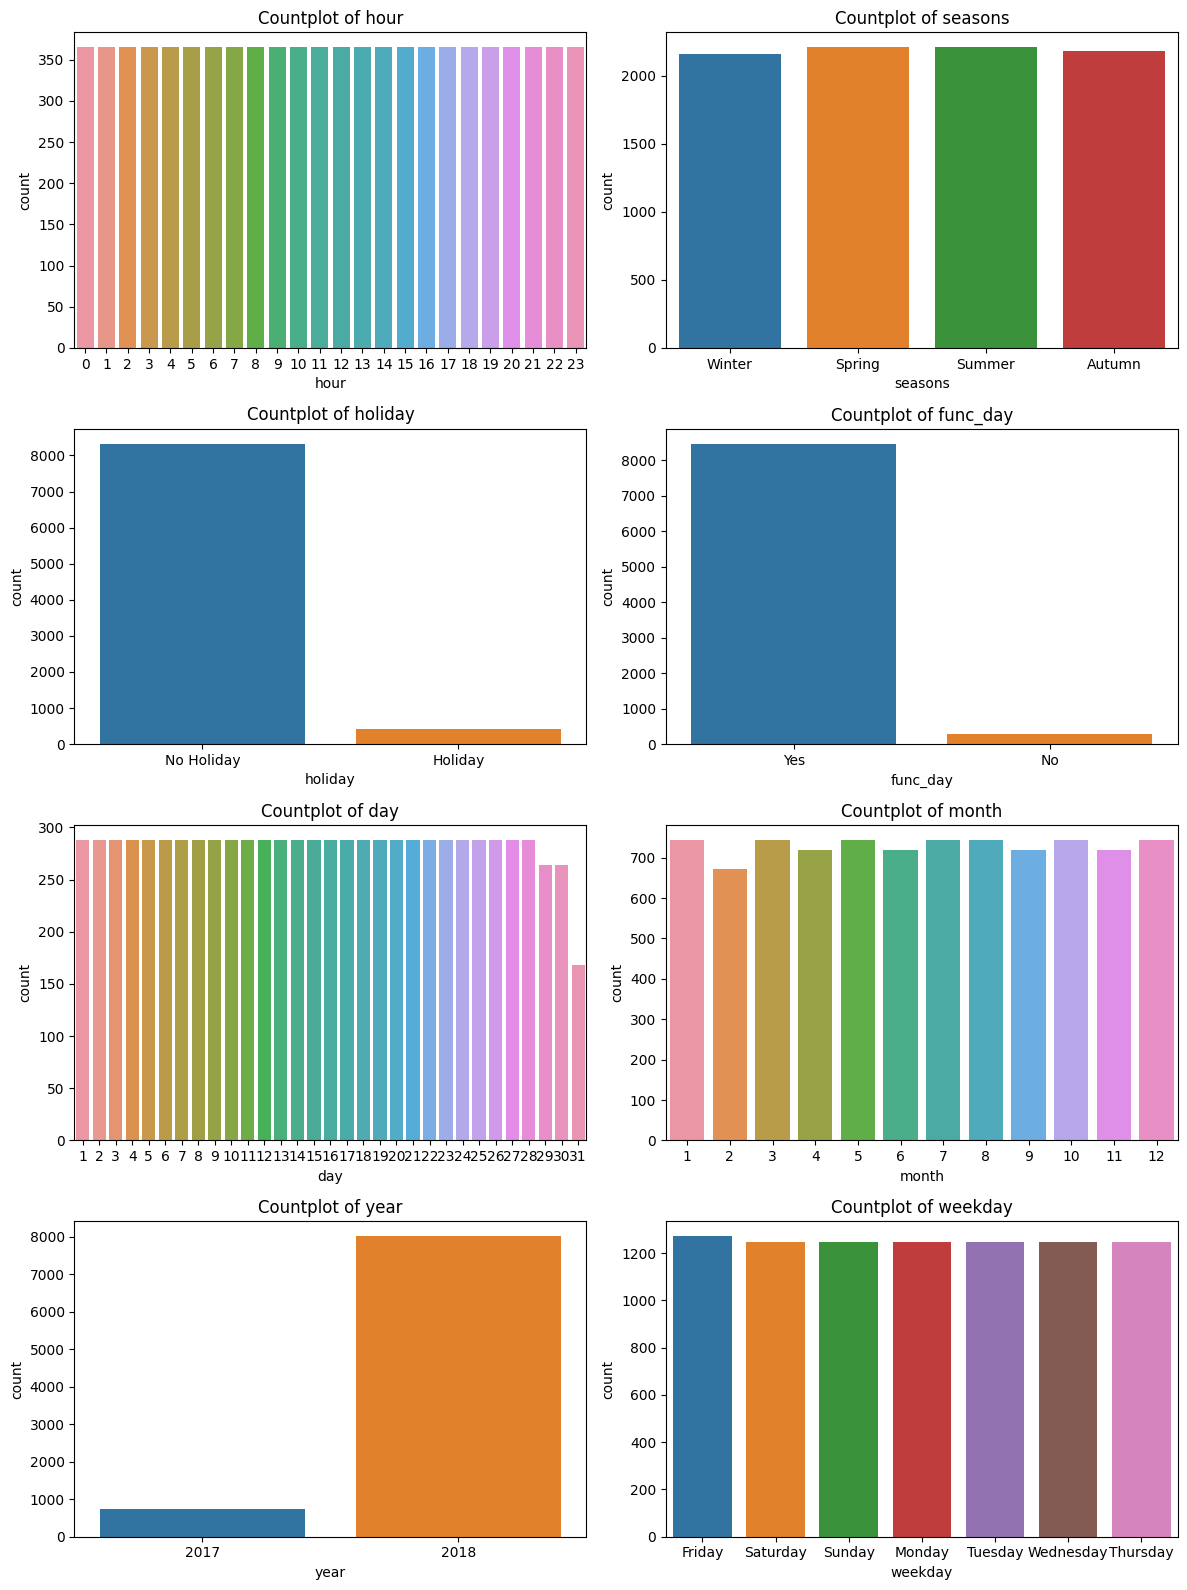

In [ ]:
# Calculate the number of rows needed for the subplot grid
num_rows = (len(categorical_feature) + 1) // 2  # Adding 1 to round up if there's an odd number of features
# Create the subplot grid
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
# Flatten the axes array for easier indexing in the loop
axes = axes.flatten()
# Loop through the categorical features and plot countplots
for i, feature in enumerate(categorical_feature):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f"Countplot of {feature}")

# Hide any unused subplots if there are an odd number of features
if len(categorical_feature) % 2 == 1:
    axes[-1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - Distribution of dependent Variable (Univariat Analysis)

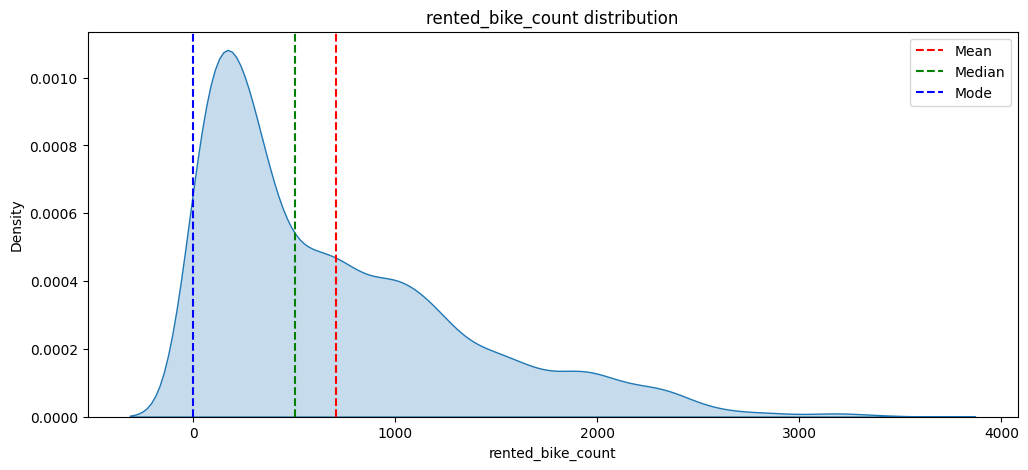

In [ ]:
# Defining dependent variable
dependent_variable = 'rented_bike_count'

# Visualizing the distribution of the dependent variable (rental bike count)
plt.figure(figsize=(12, 5))
sns.kdeplot(df[dependent_variable], fill=True)
plt.xlabel(dependent_variable)
plt.title(dependent_variable + ' distribution')
plt.axvline(df[dependent_variable].mean(), color='red', linestyle='dashed', label="Mean")
plt.axvline(df[dependent_variable].median(), color='green', linestyle='dashed', label="Median")
plt.axvline(df[dependent_variable].mode()[0], color='blue', linestyle='dashed', label="Mode")
plt.legend()  # Add legend to the plot

plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - Density and Box Plot of Numerical features

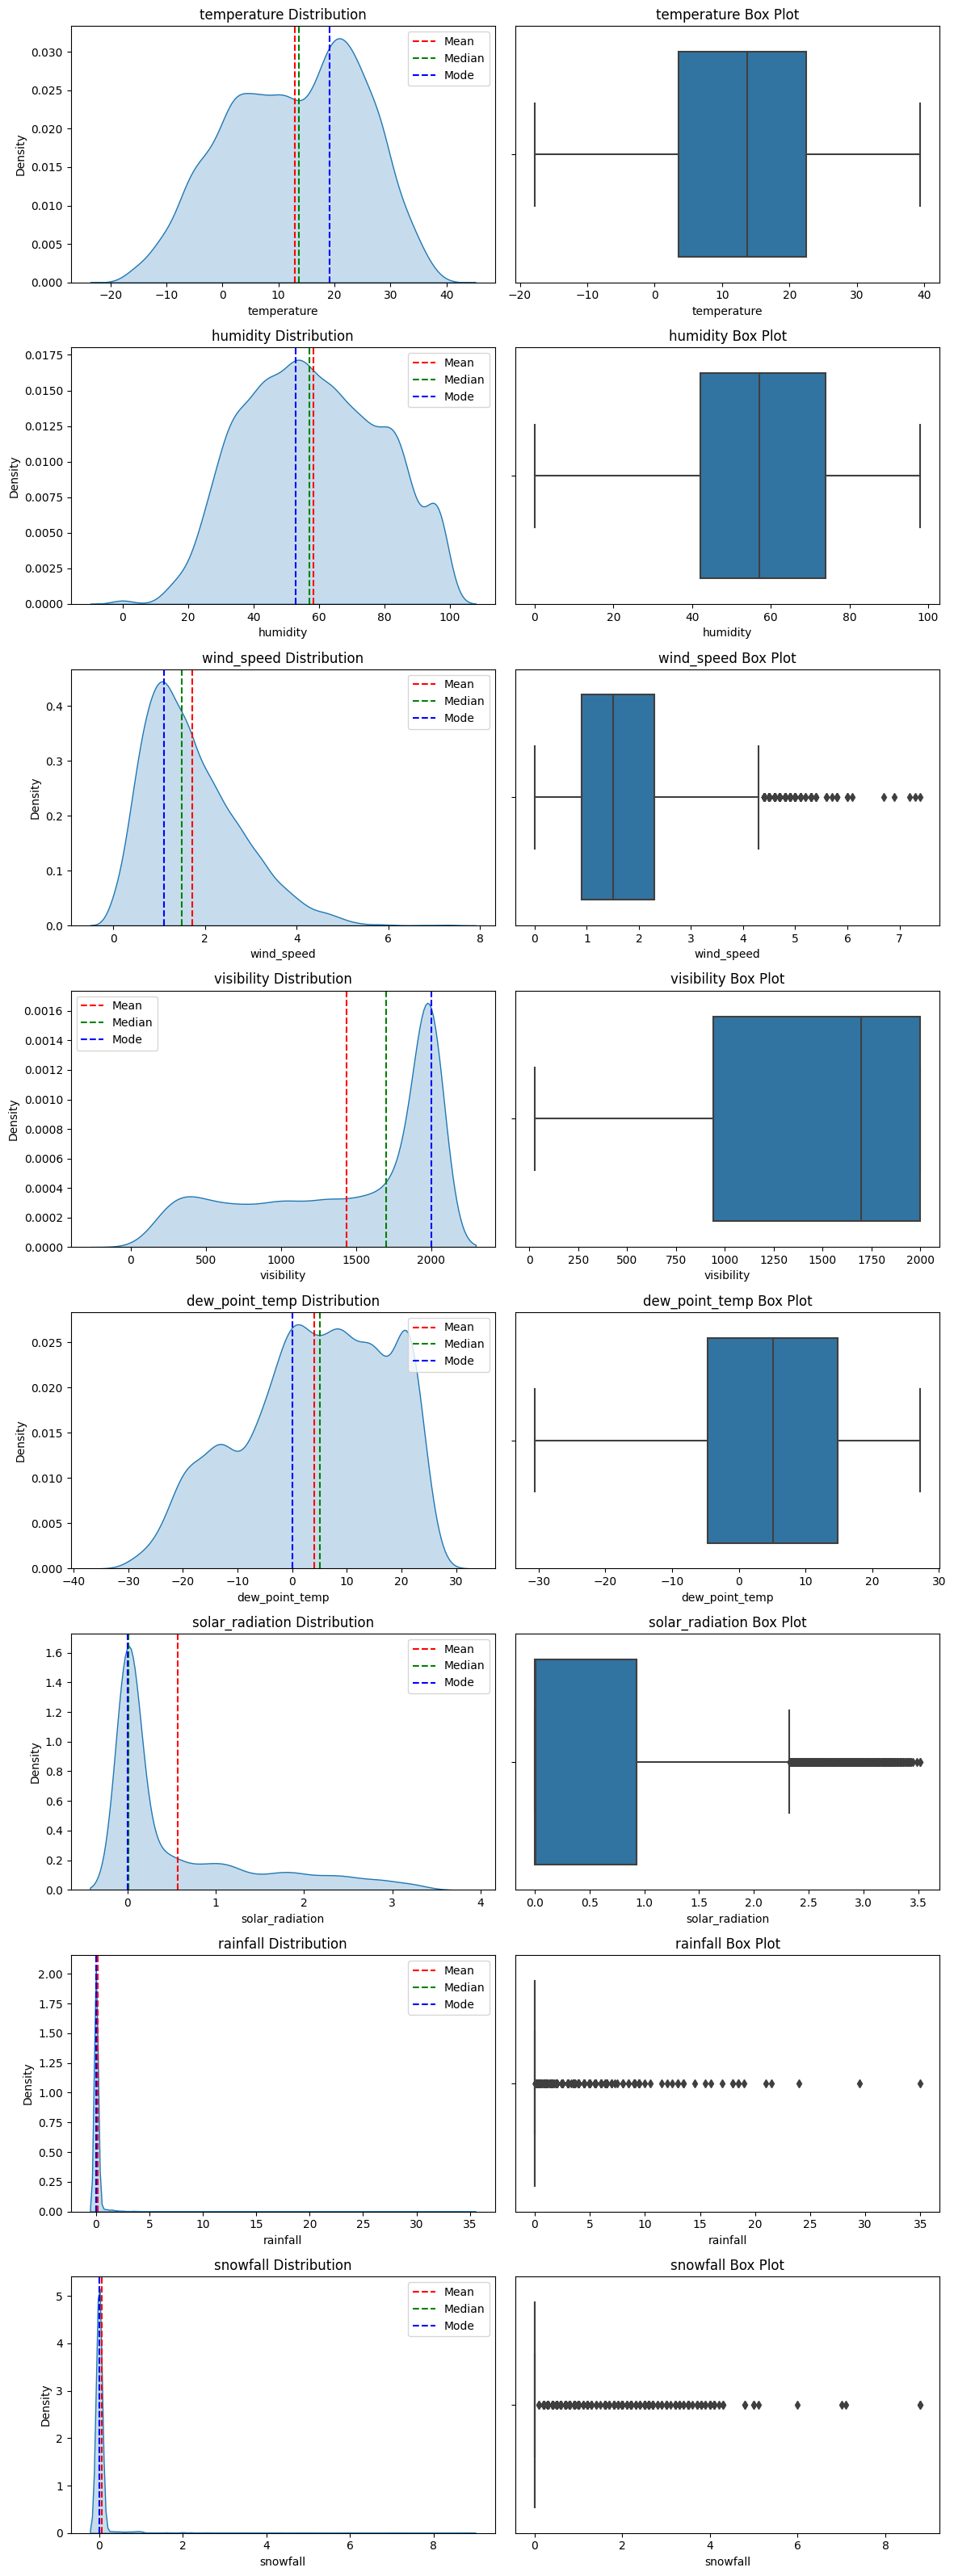

In [28]:
# Defining numerical features
numerical_features = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall']

# Create a grid of subplots
rows = len(numerical_features)
fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between subplots

# Plot distribution plot and box plot for each numerical feature
for i, feature in enumerate(numerical_features):
    # KDE plot
    sns.kdeplot(df[feature], ax=axes[i, 0], fill=True)
    axes[i, 0].set_title(f'{feature} Distribution')

    # Calculate mean, median, and mode
    mean_val = np.mean(df[feature])
    median_val = np.median(df[feature])
    mode_val = df[feature].mode().values[0]

    # Add vertical lines for mean, median, and mode on the KDE plot
    axes[i, 0].axvline(x=mean_val, color='red', linestyle='--', label='Mean')
    axes[i, 0].axvline(x=median_val, color='green', linestyle='--', label='Median')
    axes[i, 0].axvline(x=mode_val, color='blue', linestyle='--', label='Mode')

    axes[i, 0].legend()

    # Box plot
    sns.boxplot(x=feature, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} Box Plot')

plt.tight_layout()  # Adjust spacing between subplots automatically
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - **Bibariate Analysis of Categorical feature vs rented bike count**

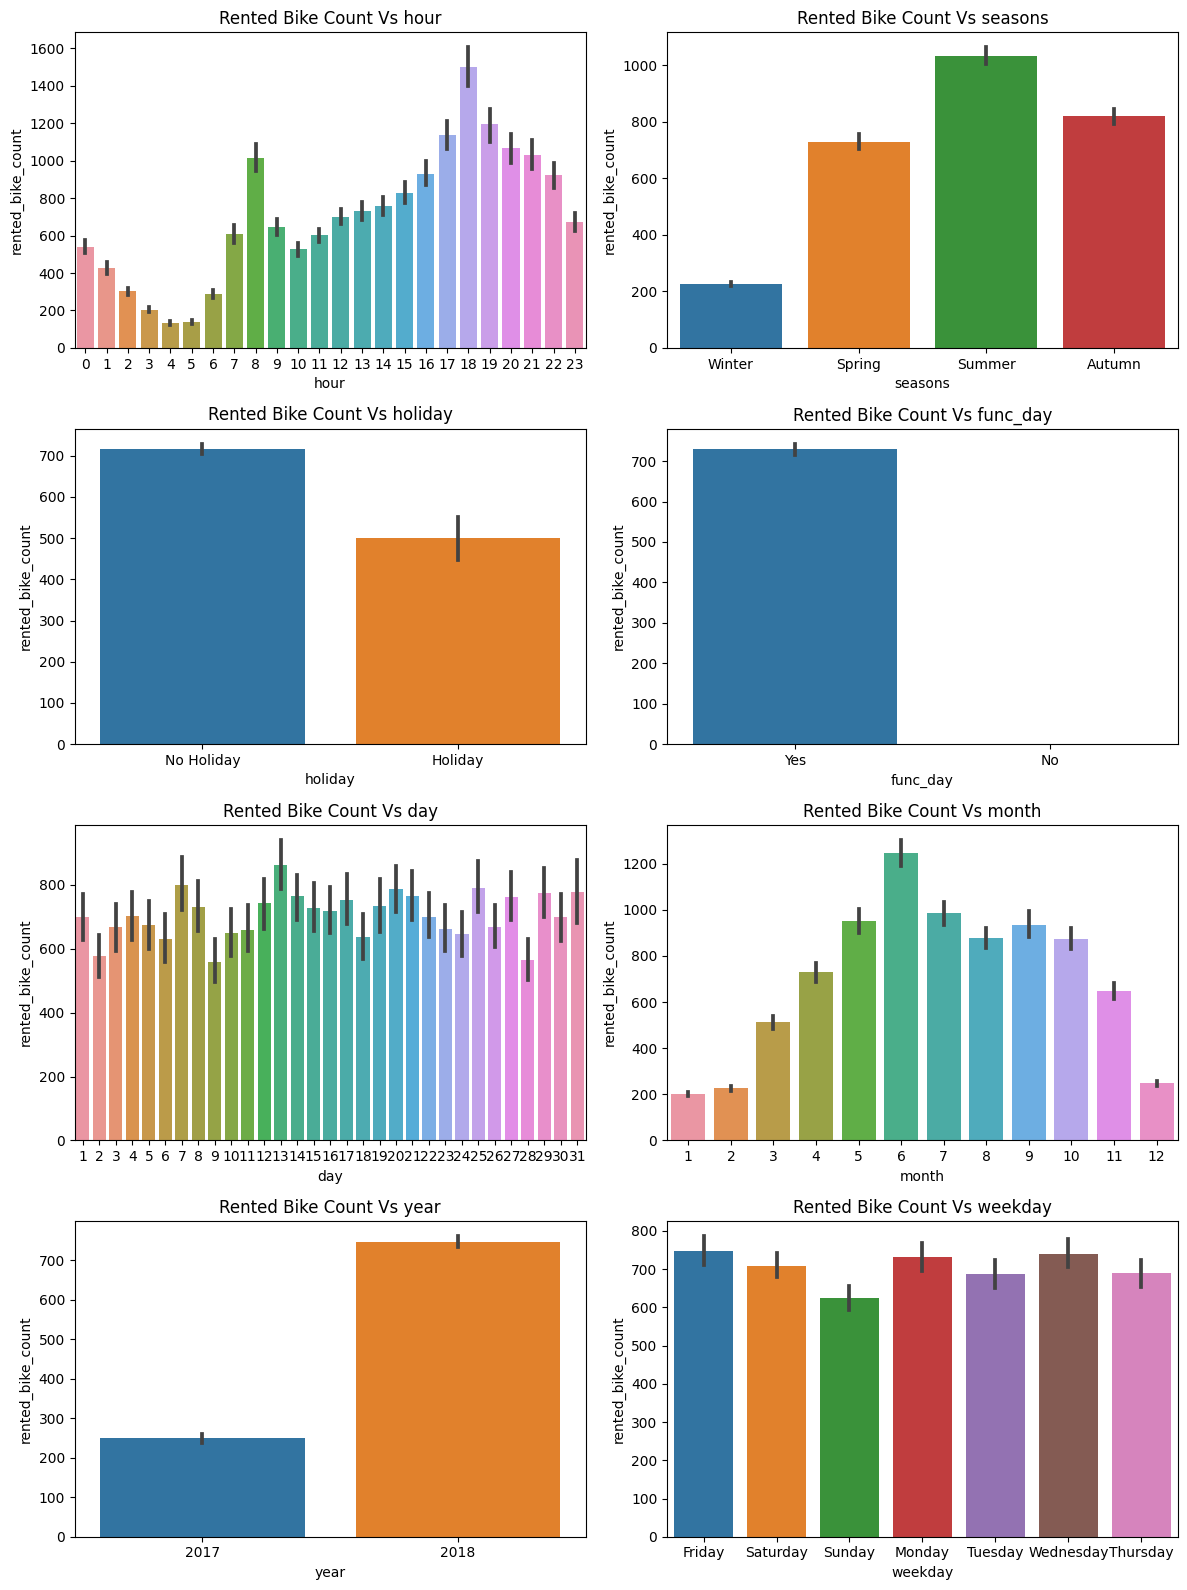

In [19]:
# Calculate the number of rows needed for the subplot grid
num_rows = (len(categorical_feature) + 1) // 2  # Adding 1 to round up if there's an odd number of features
# Create the subplot grid
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
# Flatten the axes array for easier indexing in the loop
axes = axes.flatten()
# Loop through the categorical features and plot countplots
for i, feature in enumerate(categorical_feature):
    sns.barplot(x=feature, y = "rented_bike_count", data=df, ax=axes[i])
    axes[i].set_title(f"Rented Bike Count Vs {feature}")

# Hide any unused subplots if there are an odd number of features
if len(categorical_feature) % 2 == 1:
    axes[-1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 Multivariate Analysis of Categorical Feature independent feature and dependent feature

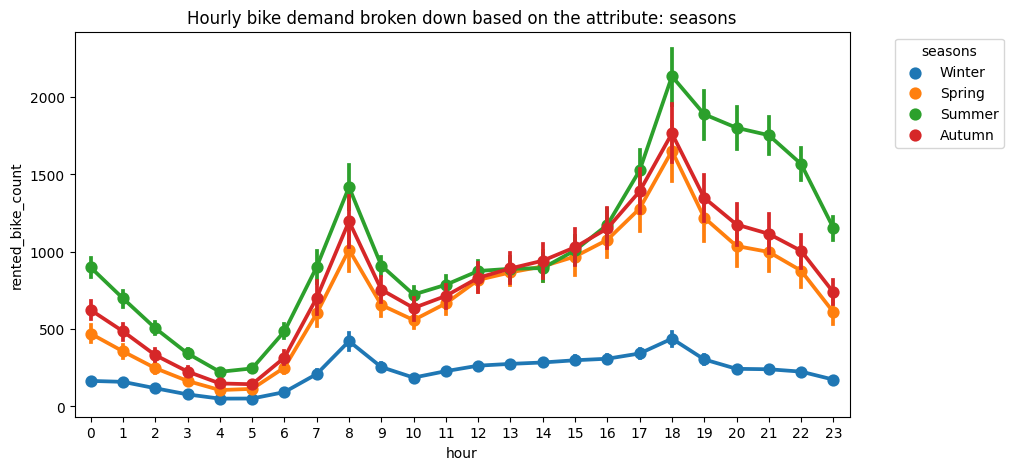

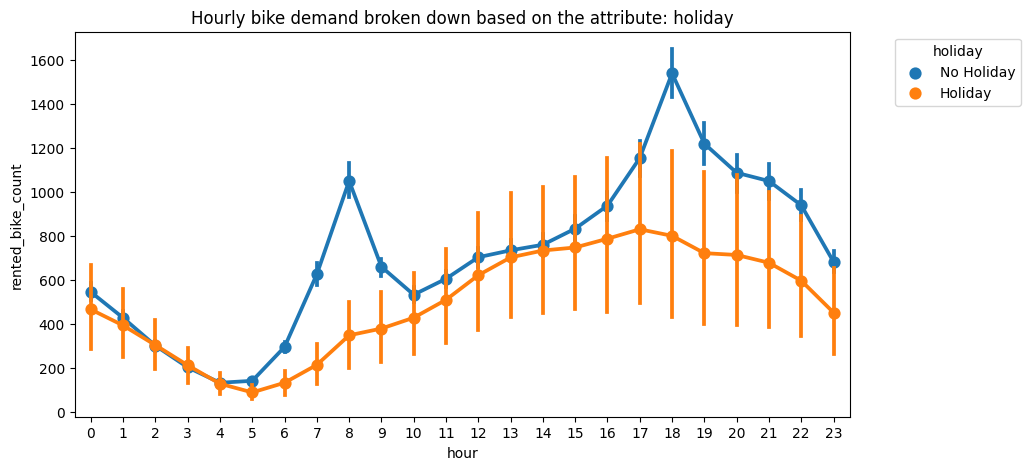

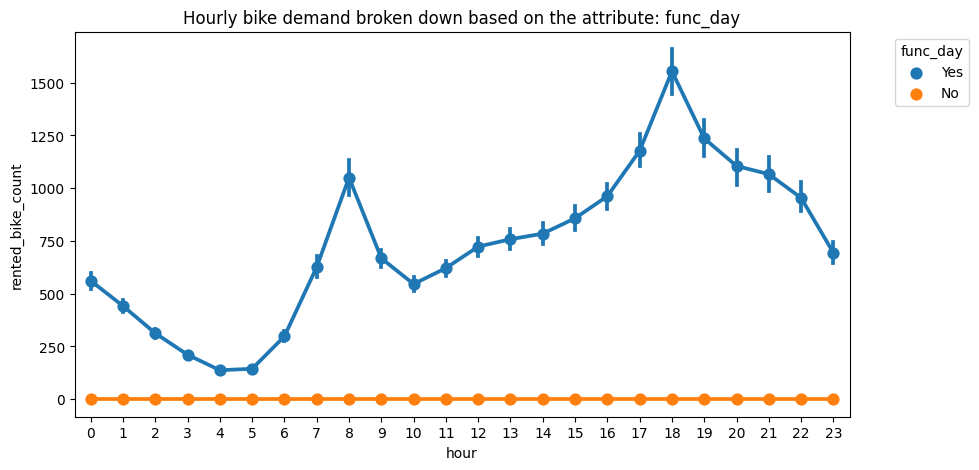

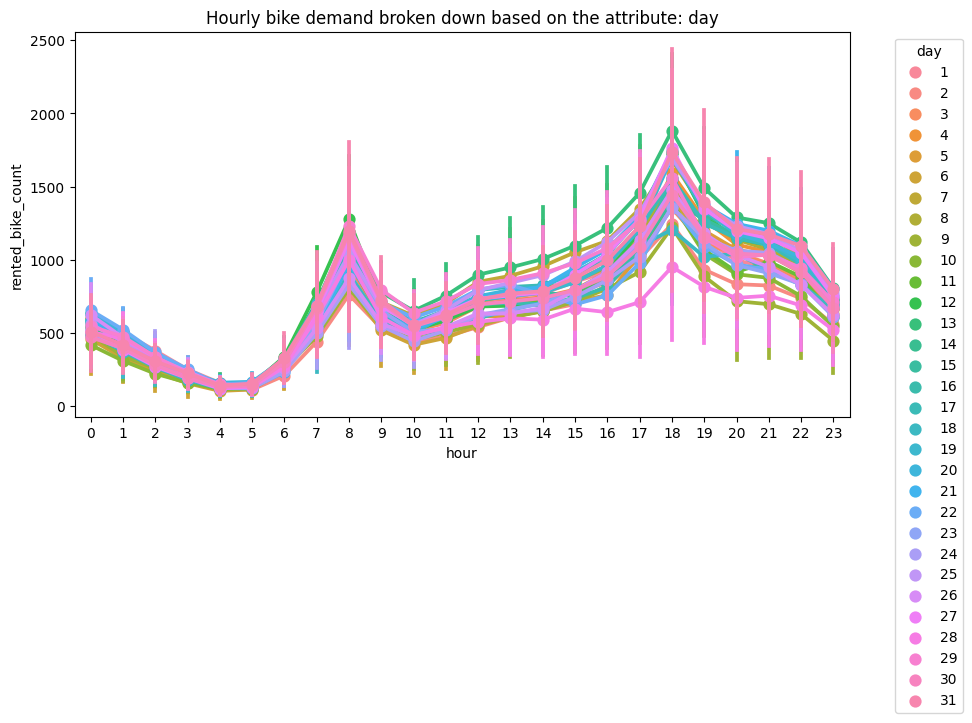

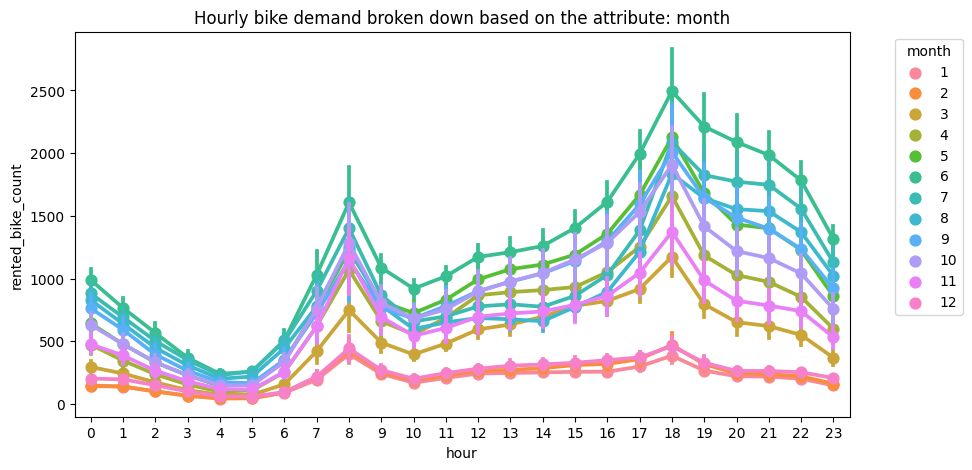

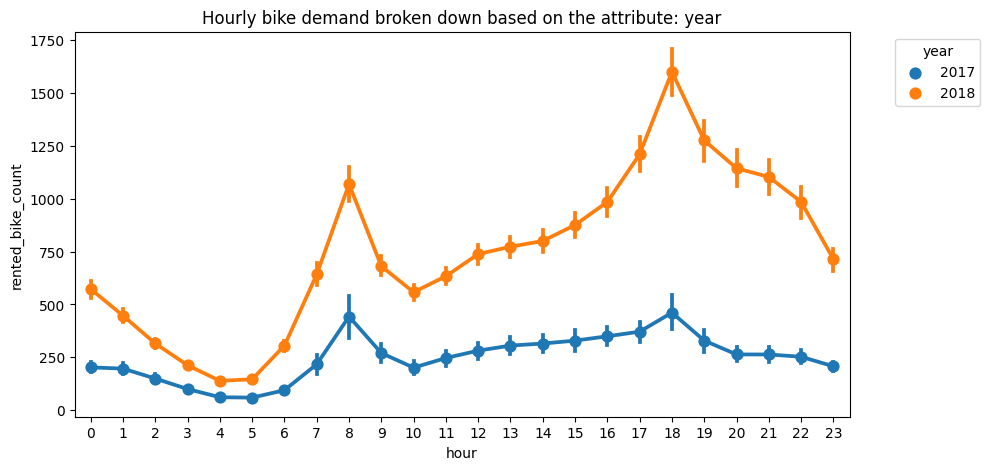

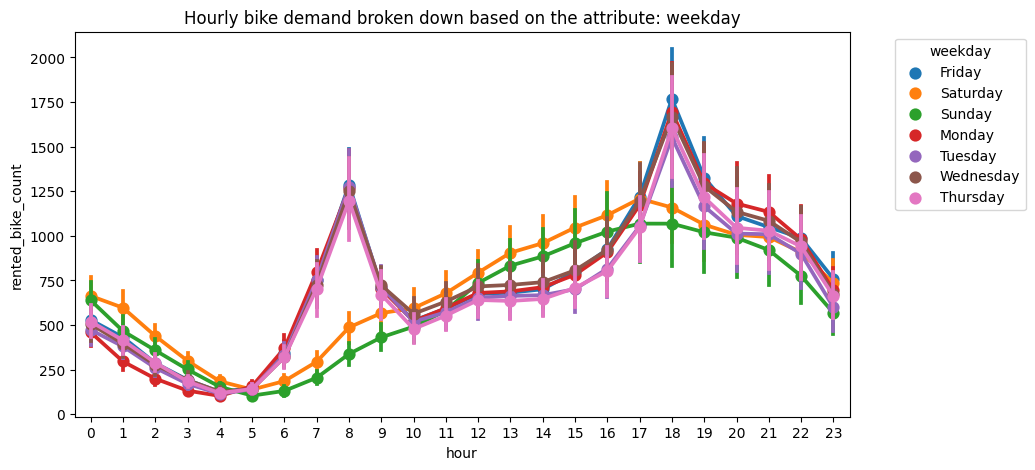

In [38]:
# Analyzing Relation of the different categorical feature on the demand of the Rented Bike Count hourly.
for feature in categorical_feature:
  if feature == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.pointplot(data=df, x='hour', y='rented_bike_count', hue=feature, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+feature)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=feature)
    plt.show


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Scatter Plot and Box plot on Numerical Fearure and Rented Bike Count

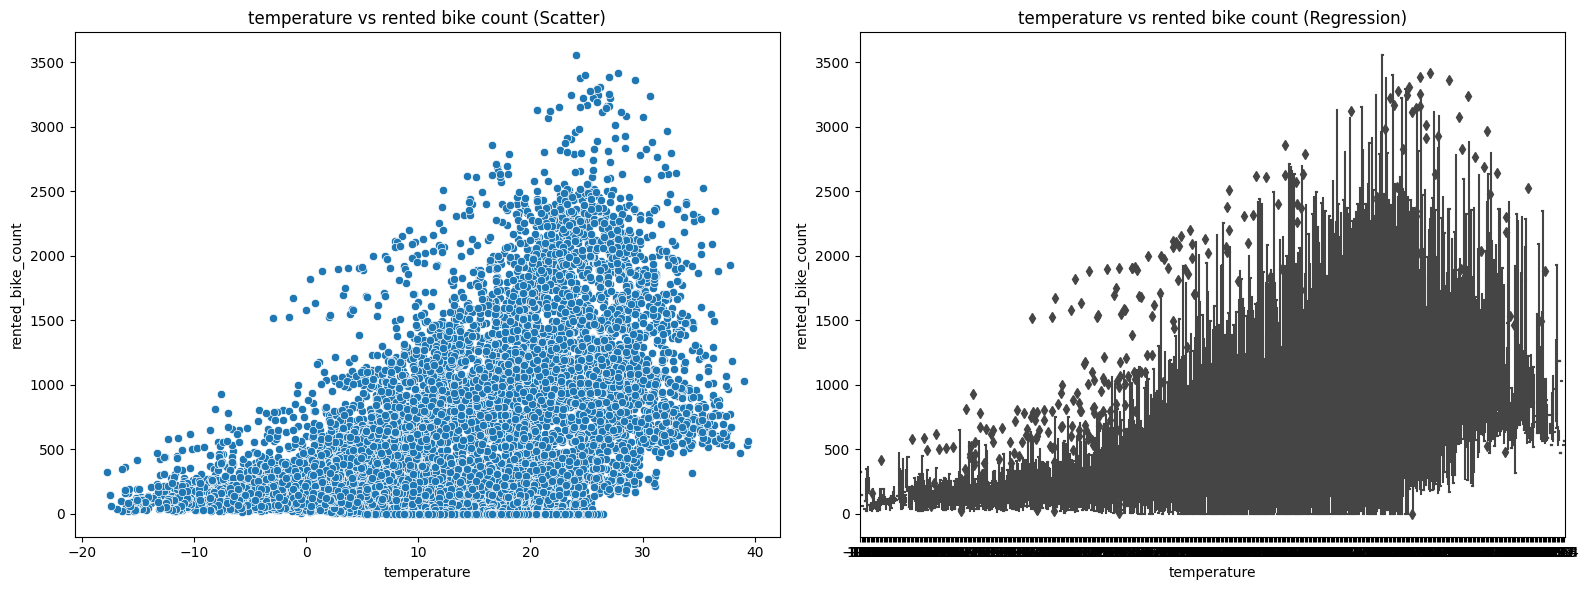

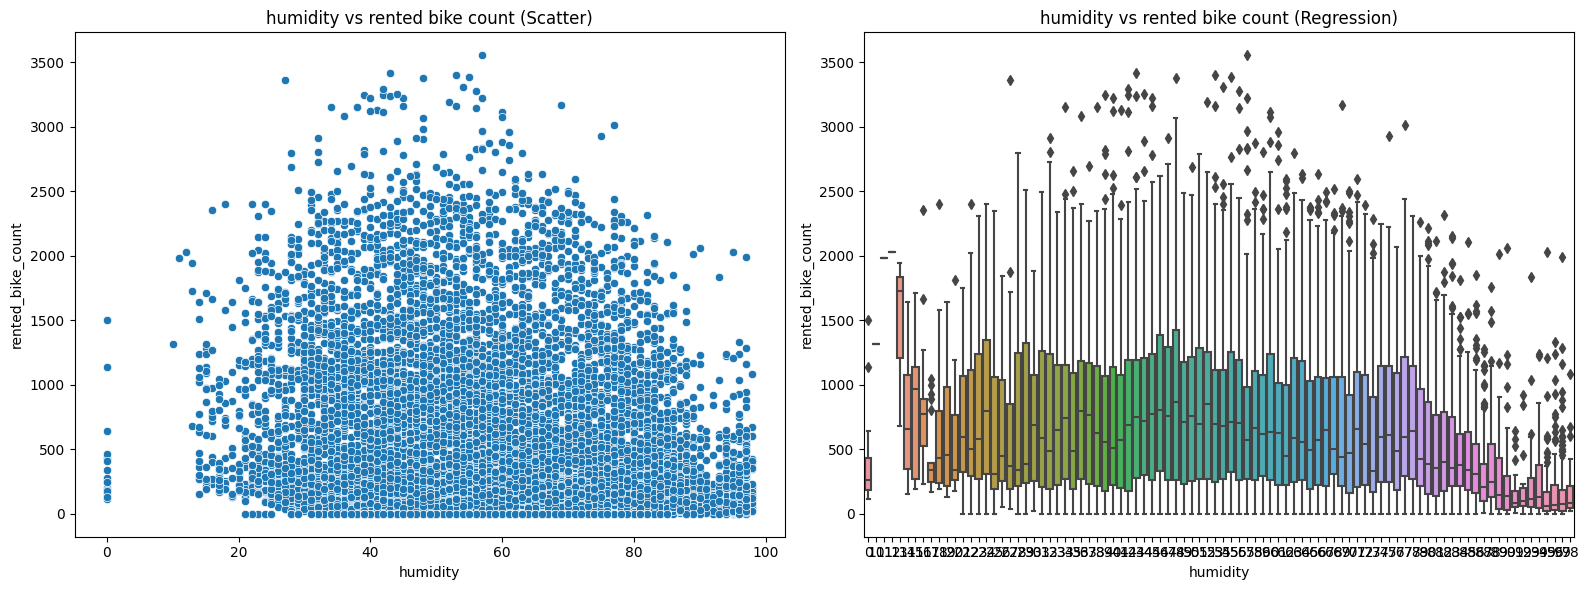

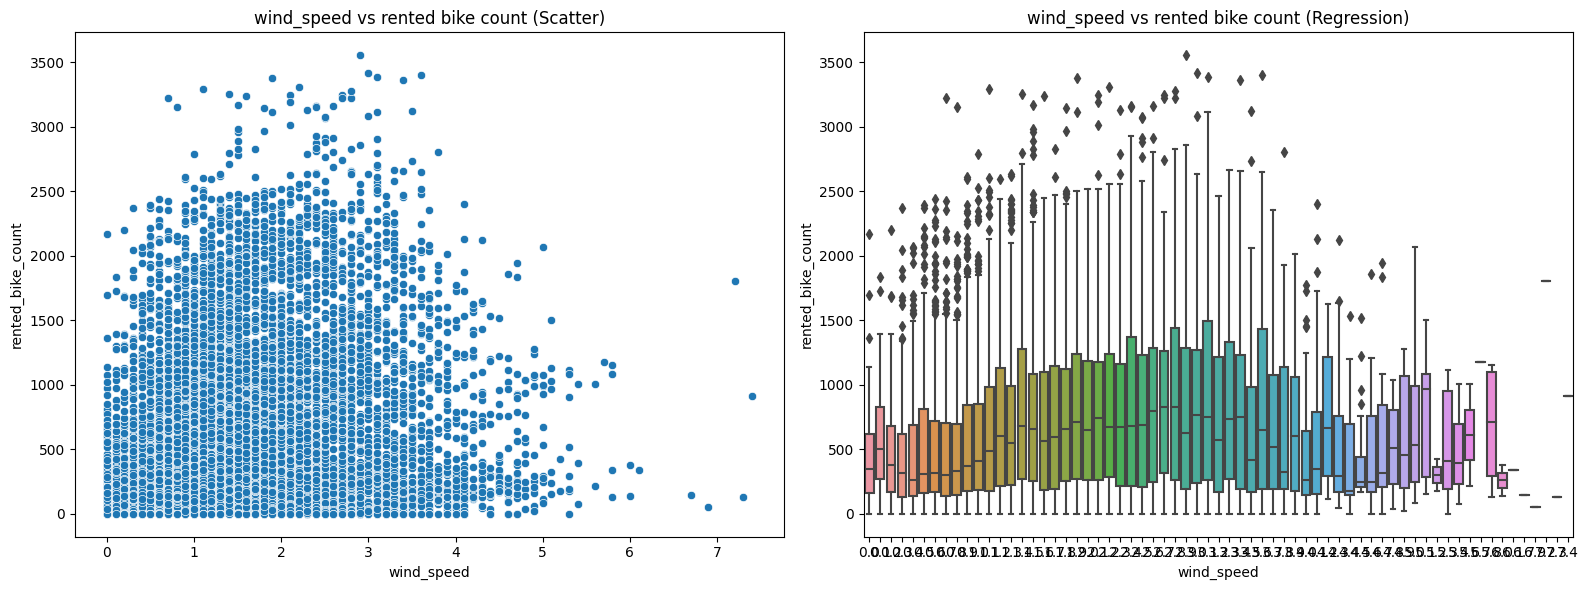

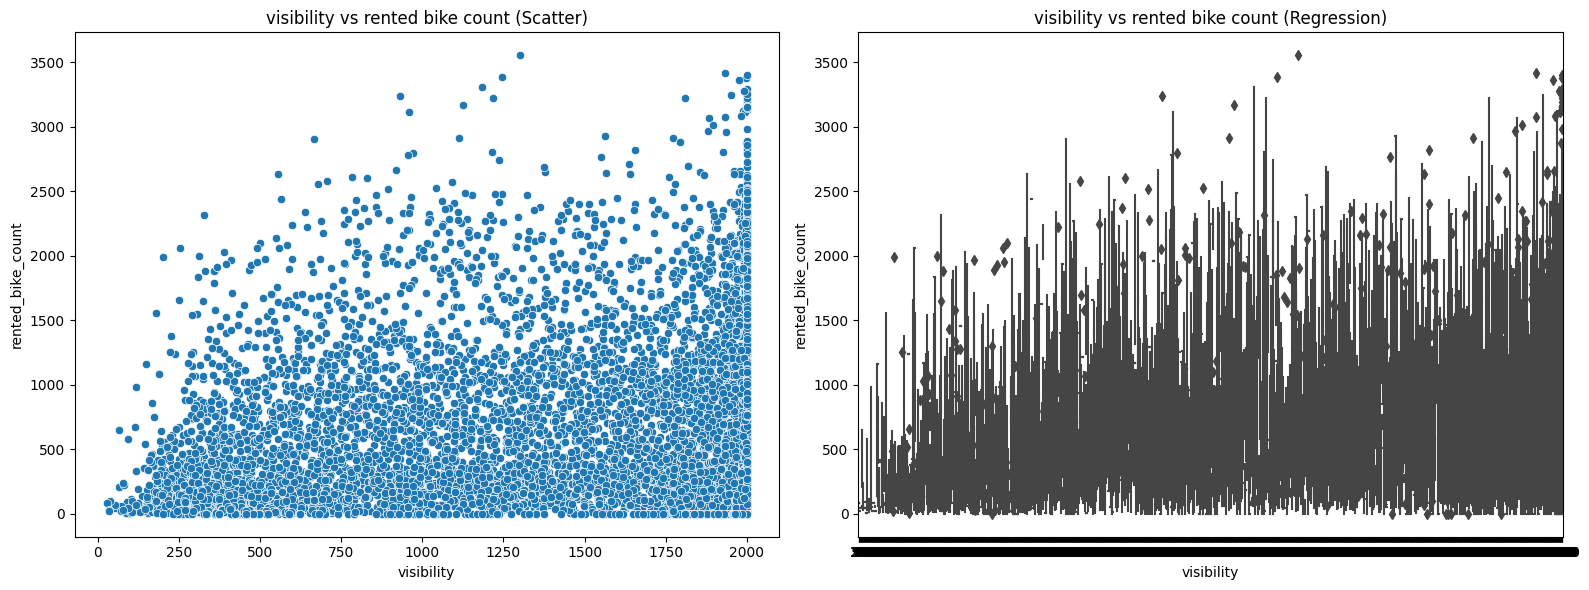

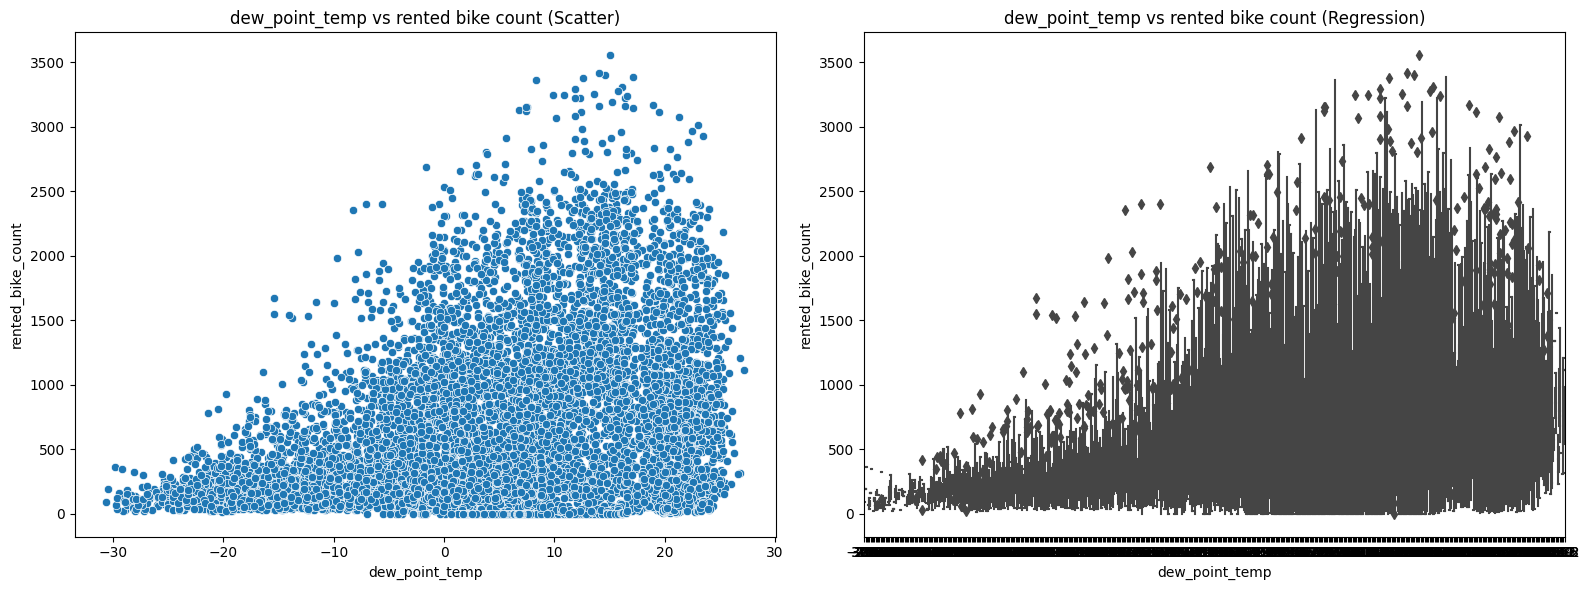

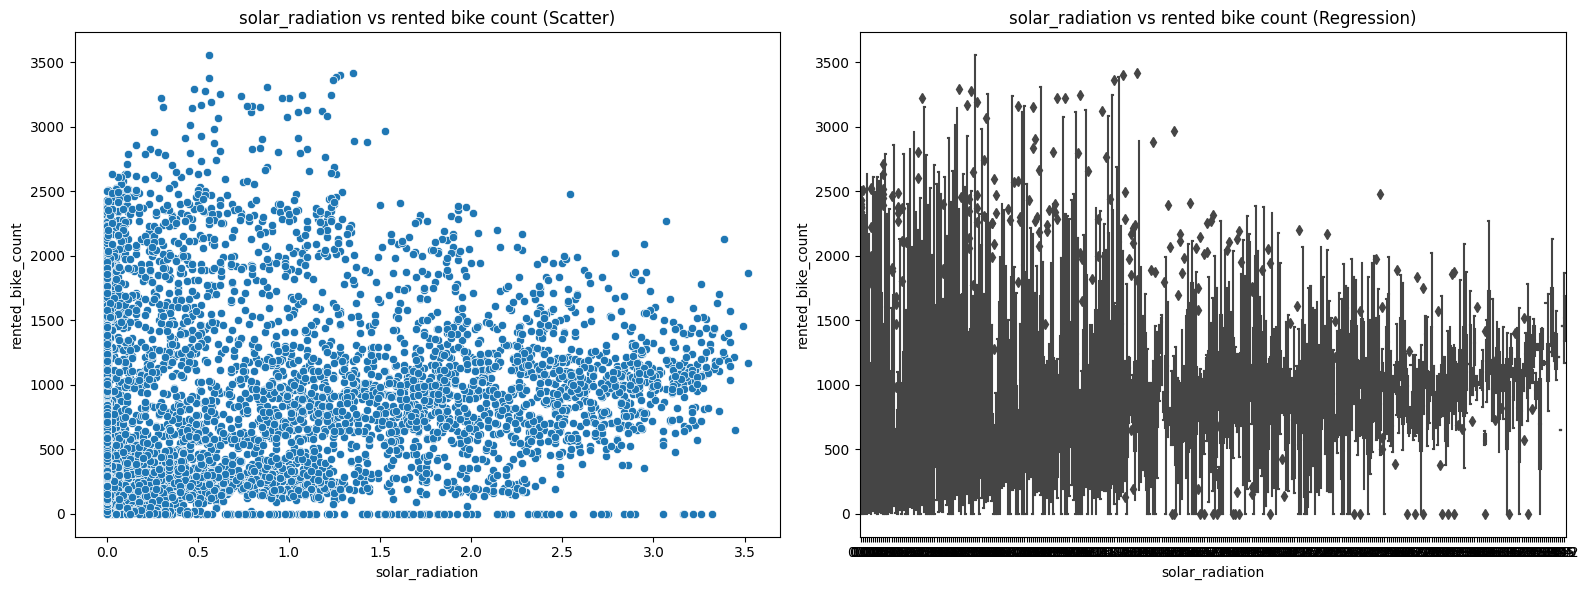

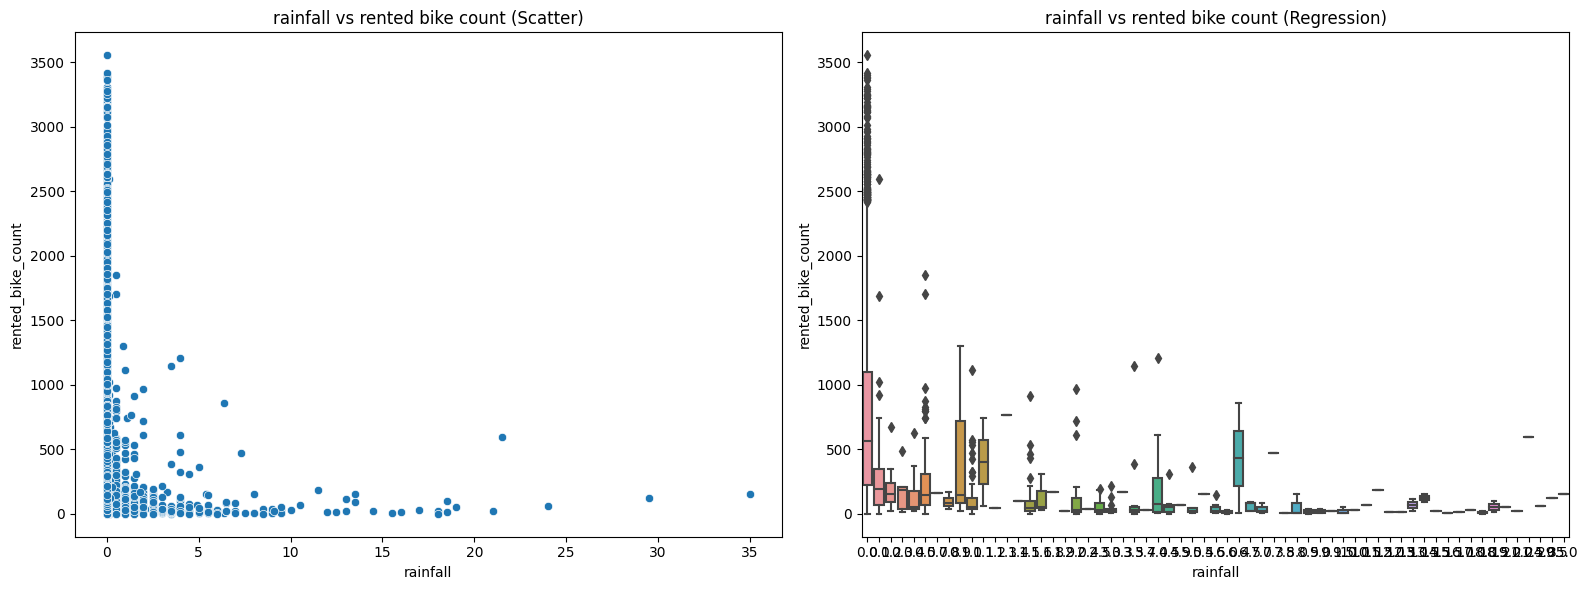

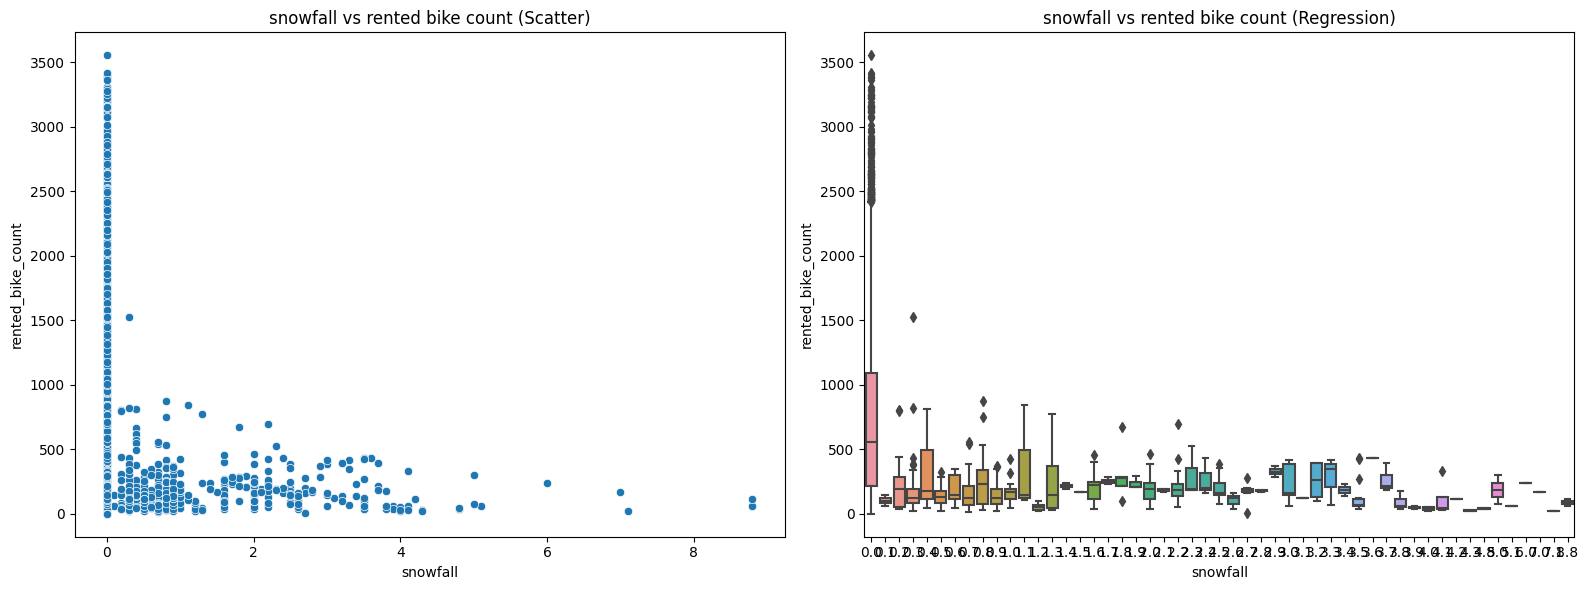

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'numerical_features' is a list of your numerical independent features
#numerical_features = ['feature1', 'feature2', 'feature3']

# Loop through numerical features
for feature in numerical_features:
    # Create a figure and a grid of 1 row and 2 columns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

    # Scatter plot
    sns.scatterplot(x=feature, y='rented_bike_count', data=df, ax=axes[0])
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('rented_bike_count')
    axes[0].set_title(f'{feature} vs rented bike count (Scatter)')

    # Regression plot
    sns.boxplot(x=feature, y='rented_bike_count', data=df, ax=axes[1])
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('rented_bike_count')
    axes[1].set_title(f'{feature} vs rented bike count (Regression)')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()


In [ ]:
# Analyzing the relationship between independent categorical features and dependent features.
for feature in numerical_features:
  plt.figure(figsize = (8,4))
  sns.regplot(x= feature, y= 'rented_bike_count', data = df)
  plt.xlabel(feature)
  plt.ylabel('rented_bike_count')
  plt.title(feature + ' vs rented bike count')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<ipython-input-107-933509f2fc16>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

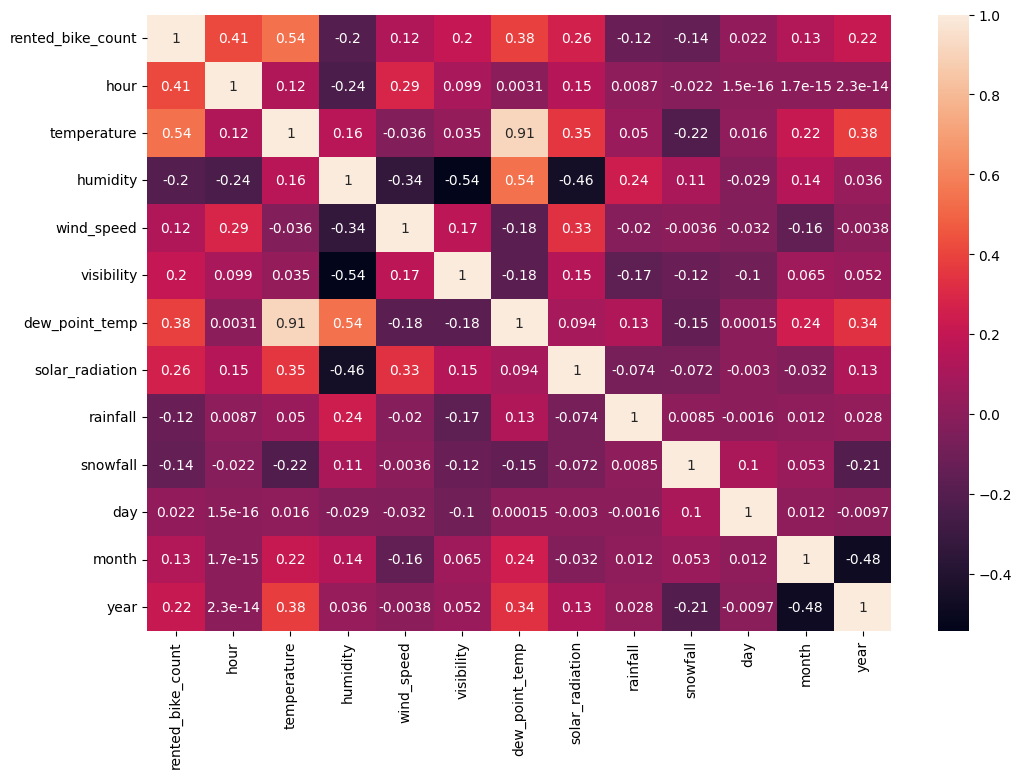

In [ ]:
# Correlation Heatmap visualization
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

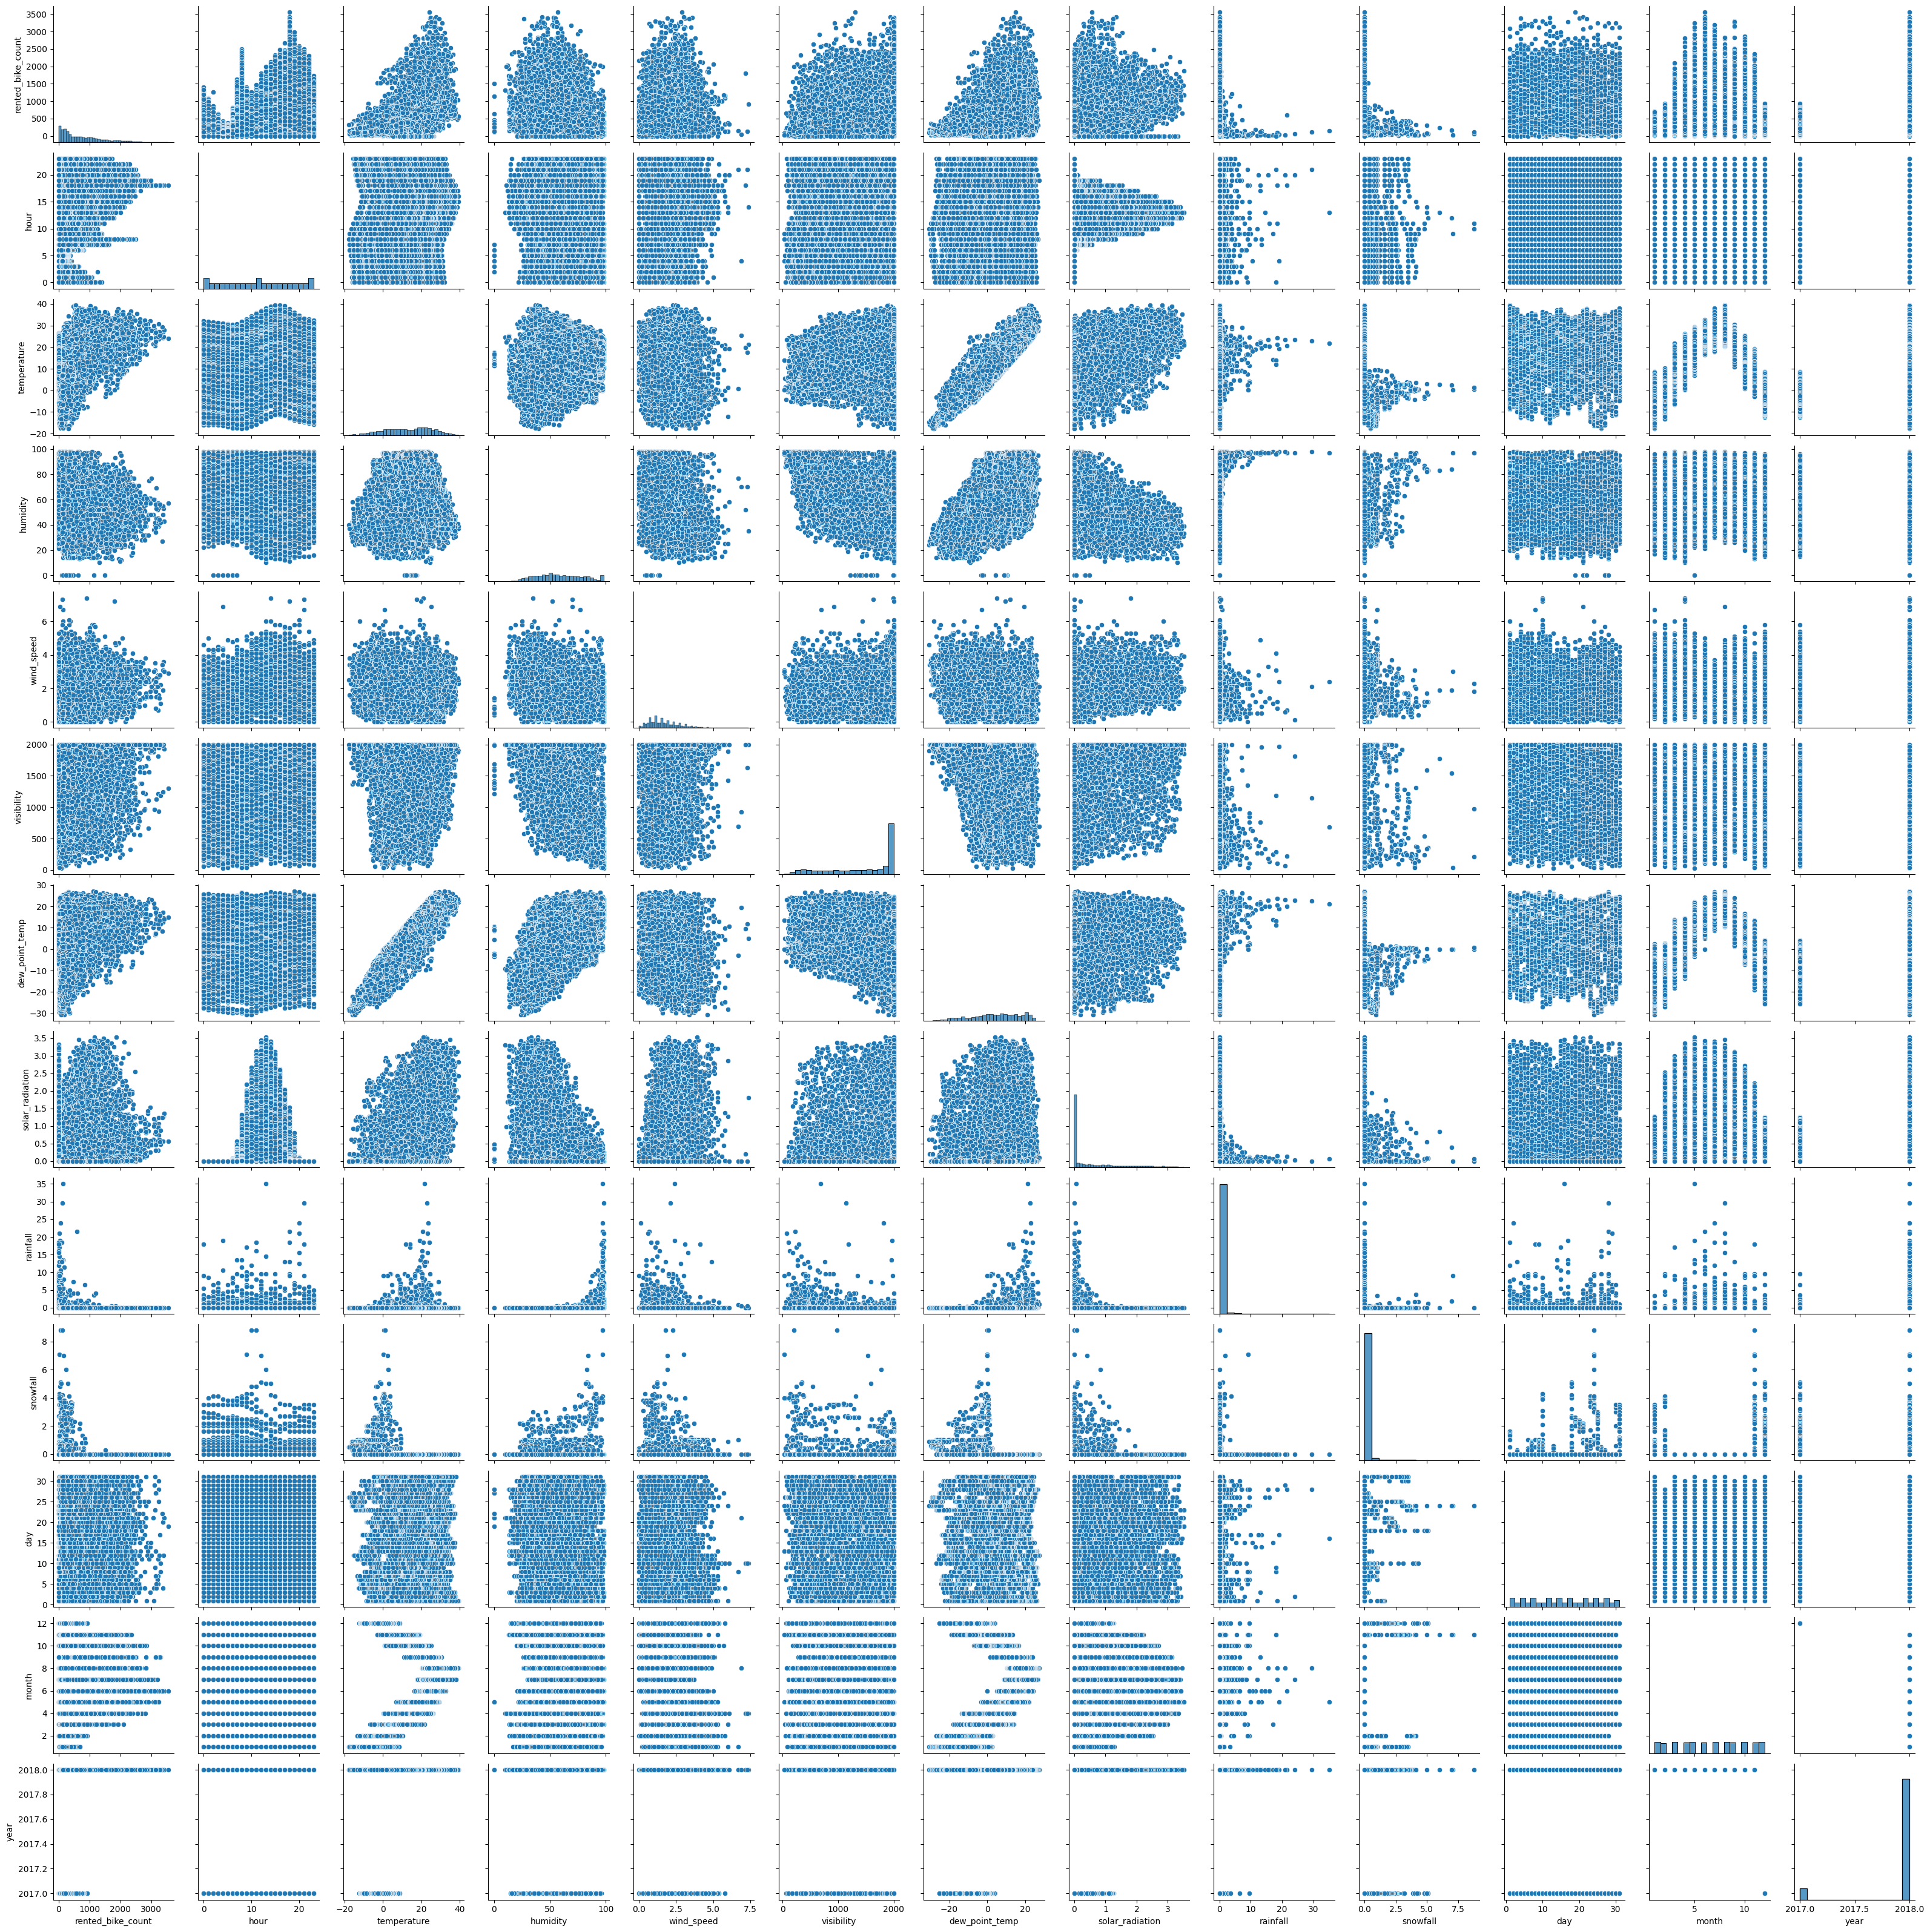

In [ ]:
# Pair Plot visualization code
sns.pairplot(data= df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values present in the data.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***